# Handling Imbalanced Dataset on Red Wine Quality Data

Created by : Ghazali Akmal Rabbani

Dedicated to : Wandry Parlindungan

Final Exam Assignment

Digital Business Experience

MBA ITB

# Download Red Wine Quality Dataset from GDrive

In [1]:
!pip install gdown

In [2]:
shareable_link = 'https://drive.google.com/file/d/1300pR-f3dvnc9sKUoq94tAO7oCh-FhP9/view?usp=sharing'

# Extract the file ID from the link
file_id = shareable_link.split('/')[-2]

In [3]:
import pandas as pd

download_link = f'https://drive.google.com/uc?id={file_id}'
output_file = 'winequality-red.csv'

# Download the file using gdown
!gdown {download_link} -O {output_file}


df = pd.read_csv(output_file)
df

Downloading...
From: https://drive.google.com/uc?id=1300pR-f3dvnc9sKUoq94tAO7oCh-FhP9
To: /content/winequality-red.csv
100% 101k/101k [00:00<00:00, 109MB/s]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Before Handling Imbalanced Dataset

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


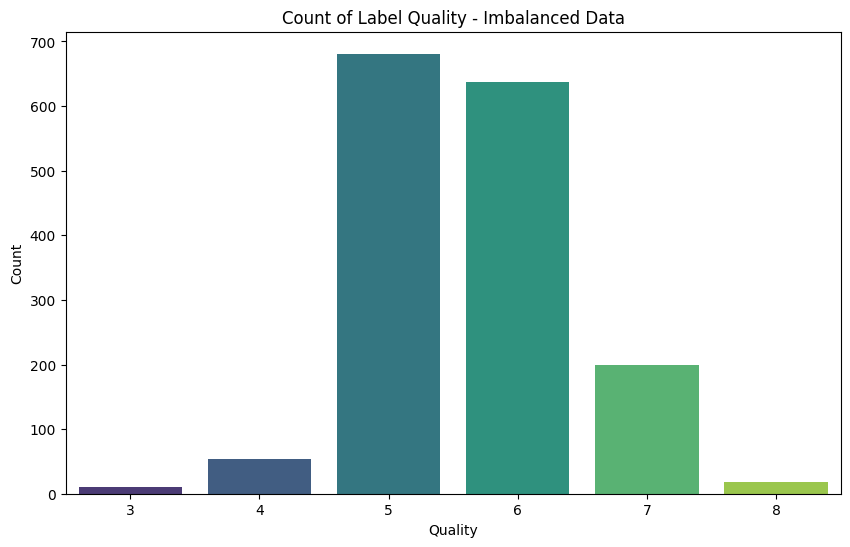

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each feature
feature_counts = pd.Series(df['quality']).value_counts()
print(feature_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_counts.index, y=feature_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Count of Label Quality - Imbalanced Data')

plt.show()

# Handling with SMOTETomek

source : https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html

In [11]:
import numpy as np
import pandas as pd
from imblearn.combine import SMOTETomek

X = df.drop('quality', axis=1)
y = df['quality']

# Apply SMOTETomek
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X, y)

# Concatenate horizontally
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

# After Handling Imbalanced Data

3    678
8    673
7    668
4    667
5    619
6    609
Name: quality, dtype: int64


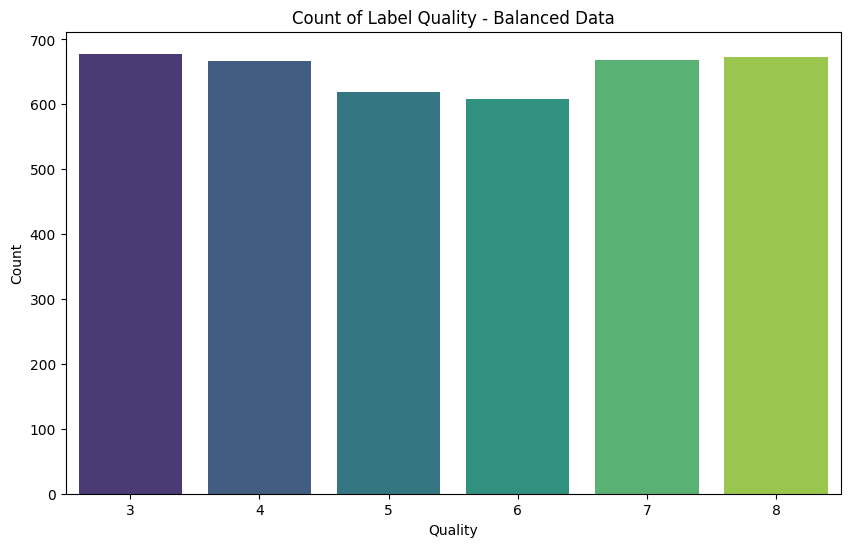

In [13]:
balanced_df['quality'].value_counts()

# Count occurrences of each feature
feature_counts = pd.Series(balanced_df['quality']).value_counts()
print(feature_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_counts.index, y=feature_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Count of Label Quality - Balanced Data')

plt.show()

In [16]:
balanced_df.to_csv('winequality-red-balanced-data.csv')